In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from process import *
from sklearn.preprocessing import LabelBinarizer
import h5py
from keras.utils import np_utils, to_categorical
from keras.models import model_from_json
import csv

/home/afadinsro/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

# all_seasons.append(season)
except csv.Error:
    print('null byte')
data = pd.DataFrame(np.array(season))

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,12,9,4,0,1,0,0,1.53,4.5,6.5
2,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,9,3,10,0,2,0,0,11,5.5,1.33
3,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,11,8,5,3,3,2,0,1.25,6.5,15
4,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,19,12,9,1,3,0,0,1.83,3.6,5
5,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,10,6,7,1,1,0,0,1.7,3.8,5.75
6,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,D,...,13,13,0,2,1,0,0,1.62,4,6.5
7,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,H,...,8,3,3,0,3,0,0,6,4.2,1.62
8,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,...,3,8,2,3,1,0,0,2.4,3.3,3.3
9,E0,13/08/17,Man United,West Ham,4,0,H,1,0,H,...,7,11,1,2,2,0,0,1.3,5.75,12


In [4]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        record = np.empty(15, dtype=object)
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            if row[2] == 'Liverpool':
                record[1] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
            
            if row[9] == 'A':
                record[4] = 0
            elif row[9] == 'B':
                record[4] = 1
            else:
                record[4] = 2
                
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            record[14] = row[6] # full time results
            
            fixtures.append(record)
            
            
    x += 10
    size += 10

fixtures = pd.DataFrame(fixtures)
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,2,1,2,6,4.2,1.62,3,3,3,3,0,3,D
1,08,1,0,0,2,1.36,5.25,9.5,1,0,4,2,1,3,H
2,08,1,2,0,2,2.15,3.7,3.5,4,0,4,3,2,4,H
3,09,0,2,0,2,1.85,4,4.2,5,0,8,3,2,2,H
4,09,1,1,1,2,1.29,6,13,1,1,12,2,1,2,D
5,09,0,1,2,0,4.1,3.9,1.91,2,3,3,6,3,3,A
6,10,0,1,1,2,5,3.8,1.67,1,1,1,5,1,1,D
7,10,1,0,0,2,2.8,3.25,2.8,0,0,7,3,0,2,D
8,10,0,3,1,2,2.25,3.5,3.39,4,1,3,5,0,1,H
9,10,1,0,0,2,1.25,6.75,13,3,0,9,2,0,1,H


In [5]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,2,1,2,6,4.2,1.62,3,3,3,3,0,3,D
1,08,1,0,0,2,1.36,5.25,9.5,1,0,4,2,1,3,H
2,08,1,2,0,2,2.15,3.7,3.5,4,0,4,3,2,4,H
3,09,0,2,0,2,1.85,4,4.2,5,0,8,3,2,2,H
4,09,1,1,1,2,1.29,6,13,1,1,12,2,1,2,D
5,09,0,1,2,0,4.1,3.9,1.91,2,3,3,6,3,3,A
6,10,0,1,1,2,5,3.8,1.67,1,1,1,5,1,1,D
7,10,1,0,0,2,2.8,3.25,2.8,0,0,7,3,0,2,D
8,10,0,3,1,2,2.25,3.5,3.39,4,1,3,5,0,1,H
9,10,1,0,0,2,1.25,6.75,13,3,0,9,2,0,1,H


In [6]:
#model without half time statistics

In [46]:
X = fixtures[[0,1,4,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[9]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)
# yt = to_categorical(Y.ix[:600,])
# print(yt.shape)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_without_halftime = X.ix[600:,]
Ytest_without_halftime = to_categorical(Y.ix[600:,], num_classes=7)

/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [47]:
without_half_time_details_FTAG_model = Sequential()
without_half_time_details_FTAG_model.add(Dense(200, input_dim=5, activation='relu'))
without_half_time_details_FTAG_model.add(Dense(500, activation='relu'))
without_half_time_details_FTAG_model.add(Dense(500, activation='sigmoid'))
without_half_time_details_FTAG_model.add(Dense(7, activation='softmax'))
without_half_time_details_FTAG_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [48]:
without_half_time_details_history = without_half_time_details_FTAG_model.fit(Xtrain, Ytrain, epochs=2500, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/2500
 - 0s - loss: 2.0452 - acc: 0.1071 - val_loss: 1.8299 - val_acc: 0.0884
Epoch 2/2500
 - 0s - loss: 1.8674 - acc: 0.1452 - val_loss: 1.6854 - val_acc: 0.4586
Epoch 3/2500
 - 0s - loss: 1.7478 - acc: 0.3333 - val_loss: 1.5884 - val_acc: 0.4586
Epoch 4/2500
 - 0s - loss: 1.6683 - acc: 0.3333 - val_loss: 1.5236 - val_acc: 0.4586
Epoch 5/2500
 - 0s - loss: 1.6159 - acc: 0.3333 - val_loss: 1.4798 - val_acc: 0.4586
Epoch 6/2500
 - 0s - loss: 1.5816 - acc: 0.3333 - val_loss: 1.4494 - val_acc: 0.4586
Epoch 7/2500
 - 0s - loss: 1.5589 - acc: 0.3333 - val_loss: 1.4277 - val_acc: 0.4586
Epoch 8/2500
 - 0s - loss: 1.5434 - acc: 0.3333 - val_loss: 1.4114 - val_acc: 0.4586
Epoch 9/2500
 - 0s - loss: 1.5325 - acc: 0.3333 - val_loss: 1.3989 - val_acc: 0.4475
Epoch 10/2500
 - 0s - loss: 1.5245 - acc: 0.3357 - val_loss: 1.3888 - val_acc: 0.3923
Epoch 11/2500
 - 0s - loss: 1.5183 - acc: 0.3119 - val_loss: 1.3807 - val_acc: 0.4088
Epoch 12/2500
 - 

Epoch 96/2500
 - 0s - loss: 1.4731 - acc: 0.3500 - val_loss: 1.3128 - val_acc: 0.4586
Epoch 97/2500
 - 0s - loss: 1.4730 - acc: 0.3524 - val_loss: 1.3127 - val_acc: 0.4586
Epoch 98/2500
 - 0s - loss: 1.4729 - acc: 0.3524 - val_loss: 1.3125 - val_acc: 0.4586
Epoch 99/2500
 - 0s - loss: 1.4728 - acc: 0.3524 - val_loss: 1.3124 - val_acc: 0.4586
Epoch 100/2500
 - 0s - loss: 1.4727 - acc: 0.3500 - val_loss: 1.3123 - val_acc: 0.4586
Epoch 101/2500
 - 0s - loss: 1.4726 - acc: 0.3500 - val_loss: 1.3122 - val_acc: 0.4586
Epoch 102/2500
 - 0s - loss: 1.4726 - acc: 0.3500 - val_loss: 1.3120 - val_acc: 0.4641
Epoch 103/2500
 - 0s - loss: 1.4725 - acc: 0.3500 - val_loss: 1.3119 - val_acc: 0.4641
Epoch 104/2500
 - 0s - loss: 1.4724 - acc: 0.3500 - val_loss: 1.3118 - val_acc: 0.4586
Epoch 105/2500
 - 0s - loss: 1.4723 - acc: 0.3476 - val_loss: 1.3116 - val_acc: 0.4586
Epoch 106/2500
 - 0s - loss: 1.4722 - acc: 0.3500 - val_loss: 1.3115 - val_acc: 0.4586
Epoch 107/2500
 - 0s - loss: 1.4721 - acc: 0.35

Epoch 191/2500
 - 0s - loss: 1.4651 - acc: 0.3833 - val_loss: 1.3031 - val_acc: 0.5359
Epoch 192/2500
 - 0s - loss: 1.4650 - acc: 0.3833 - val_loss: 1.3030 - val_acc: 0.5359
Epoch 193/2500
 - 0s - loss: 1.4649 - acc: 0.3857 - val_loss: 1.3029 - val_acc: 0.5359
Epoch 194/2500
 - 0s - loss: 1.4648 - acc: 0.3881 - val_loss: 1.3028 - val_acc: 0.5359
Epoch 195/2500
 - 0s - loss: 1.4648 - acc: 0.3881 - val_loss: 1.3027 - val_acc: 0.5414
Epoch 196/2500
 - 0s - loss: 1.4647 - acc: 0.3881 - val_loss: 1.3026 - val_acc: 0.5414
Epoch 197/2500
 - 0s - loss: 1.4646 - acc: 0.3881 - val_loss: 1.3026 - val_acc: 0.5414
Epoch 198/2500
 - 0s - loss: 1.4645 - acc: 0.3857 - val_loss: 1.3025 - val_acc: 0.5414
Epoch 199/2500
 - 0s - loss: 1.4644 - acc: 0.3857 - val_loss: 1.3024 - val_acc: 0.5414
Epoch 200/2500
 - 0s - loss: 1.4643 - acc: 0.3857 - val_loss: 1.3023 - val_acc: 0.5414
Epoch 201/2500
 - 0s - loss: 1.4643 - acc: 0.3857 - val_loss: 1.3022 - val_acc: 0.5414
Epoch 202/2500
 - 0s - loss: 1.4642 - acc: 

 - 0s - loss: 1.4573 - acc: 0.3881 - val_loss: 1.2951 - val_acc: 0.5359
Epoch 286/2500
 - 0s - loss: 1.4573 - acc: 0.3881 - val_loss: 1.2950 - val_acc: 0.5359
Epoch 287/2500
 - 0s - loss: 1.4572 - acc: 0.3881 - val_loss: 1.2950 - val_acc: 0.5359
Epoch 288/2500
 - 0s - loss: 1.4571 - acc: 0.3881 - val_loss: 1.2949 - val_acc: 0.5359
Epoch 289/2500
 - 0s - loss: 1.4570 - acc: 0.3881 - val_loss: 1.2948 - val_acc: 0.5359
Epoch 290/2500
 - 0s - loss: 1.4569 - acc: 0.3881 - val_loss: 1.2947 - val_acc: 0.5359
Epoch 291/2500
 - 0s - loss: 1.4568 - acc: 0.3881 - val_loss: 1.2946 - val_acc: 0.5359
Epoch 292/2500
 - 0s - loss: 1.4568 - acc: 0.3881 - val_loss: 1.2945 - val_acc: 0.5359
Epoch 293/2500
 - 0s - loss: 1.4567 - acc: 0.3881 - val_loss: 1.2945 - val_acc: 0.5359
Epoch 294/2500
 - 0s - loss: 1.4566 - acc: 0.3881 - val_loss: 1.2944 - val_acc: 0.5359
Epoch 295/2500
 - 0s - loss: 1.4565 - acc: 0.3881 - val_loss: 1.2943 - val_acc: 0.5359
Epoch 296/2500
 - 0s - loss: 1.4564 - acc: 0.3881 - val_lo

Epoch 380/2500
 - 0s - loss: 1.4491 - acc: 0.3905 - val_loss: 1.2869 - val_acc: 0.5359
Epoch 381/2500
 - 0s - loss: 1.4490 - acc: 0.3905 - val_loss: 1.2869 - val_acc: 0.5359
Epoch 382/2500
 - 0s - loss: 1.4489 - acc: 0.3905 - val_loss: 1.2868 - val_acc: 0.5359
Epoch 383/2500
 - 0s - loss: 1.4489 - acc: 0.3905 - val_loss: 1.2867 - val_acc: 0.5359
Epoch 384/2500
 - 0s - loss: 1.4488 - acc: 0.3905 - val_loss: 1.2866 - val_acc: 0.5359
Epoch 385/2500
 - 0s - loss: 1.4487 - acc: 0.3905 - val_loss: 1.2865 - val_acc: 0.5359
Epoch 386/2500
 - 0s - loss: 1.4486 - acc: 0.3905 - val_loss: 1.2864 - val_acc: 0.5359
Epoch 387/2500
 - 0s - loss: 1.4485 - acc: 0.3905 - val_loss: 1.2863 - val_acc: 0.5359
Epoch 388/2500
 - 0s - loss: 1.4484 - acc: 0.3905 - val_loss: 1.2862 - val_acc: 0.5359
Epoch 389/2500
 - 0s - loss: 1.4483 - acc: 0.3905 - val_loss: 1.2861 - val_acc: 0.5359
Epoch 390/2500
 - 0s - loss: 1.4482 - acc: 0.3905 - val_loss: 1.2861 - val_acc: 0.5359
Epoch 391/2500
 - 0s - loss: 1.4481 - acc: 

 - 0s - loss: 1.4404 - acc: 0.3929 - val_loss: 1.2782 - val_acc: 0.5359
Epoch 475/2500
 - 0s - loss: 1.4403 - acc: 0.3929 - val_loss: 1.2781 - val_acc: 0.5359
Epoch 476/2500
 - 0s - loss: 1.4402 - acc: 0.3929 - val_loss: 1.2780 - val_acc: 0.5359
Epoch 477/2500
 - 0s - loss: 1.4401 - acc: 0.3929 - val_loss: 1.2779 - val_acc: 0.5359
Epoch 478/2500
 - 0s - loss: 1.4400 - acc: 0.3929 - val_loss: 1.2778 - val_acc: 0.5359
Epoch 479/2500
 - 0s - loss: 1.4399 - acc: 0.3929 - val_loss: 1.2777 - val_acc: 0.5359
Epoch 480/2500
 - 0s - loss: 1.4398 - acc: 0.3929 - val_loss: 1.2776 - val_acc: 0.5359
Epoch 481/2500
 - 0s - loss: 1.4397 - acc: 0.3929 - val_loss: 1.2775 - val_acc: 0.5359
Epoch 482/2500
 - 0s - loss: 1.4396 - acc: 0.3929 - val_loss: 1.2774 - val_acc: 0.5359
Epoch 483/2500
 - 0s - loss: 1.4395 - acc: 0.3929 - val_loss: 1.2773 - val_acc: 0.5359
Epoch 484/2500
 - 0s - loss: 1.4394 - acc: 0.3929 - val_loss: 1.2773 - val_acc: 0.5359
Epoch 485/2500
 - 0s - loss: 1.4393 - acc: 0.3929 - val_lo

Epoch 569/2500
 - 0s - loss: 1.4306 - acc: 0.3905 - val_loss: 1.2685 - val_acc: 0.5359
Epoch 570/2500
 - 0s - loss: 1.4305 - acc: 0.3905 - val_loss: 1.2684 - val_acc: 0.5359
Epoch 571/2500
 - 0s - loss: 1.4304 - acc: 0.3905 - val_loss: 1.2683 - val_acc: 0.5359
Epoch 572/2500
 - 0s - loss: 1.4303 - acc: 0.3905 - val_loss: 1.2682 - val_acc: 0.5359
Epoch 573/2500
 - 0s - loss: 1.4301 - acc: 0.3905 - val_loss: 1.2681 - val_acc: 0.5359
Epoch 574/2500
 - 0s - loss: 1.4300 - acc: 0.3905 - val_loss: 1.2680 - val_acc: 0.5359
Epoch 575/2500
 - 0s - loss: 1.4299 - acc: 0.3905 - val_loss: 1.2679 - val_acc: 0.5359
Epoch 576/2500
 - 0s - loss: 1.4298 - acc: 0.3905 - val_loss: 1.2678 - val_acc: 0.5359
Epoch 577/2500
 - 0s - loss: 1.4297 - acc: 0.3905 - val_loss: 1.2677 - val_acc: 0.5359
Epoch 578/2500
 - 0s - loss: 1.4296 - acc: 0.3905 - val_loss: 1.2676 - val_acc: 0.5359
Epoch 579/2500
 - 0s - loss: 1.4295 - acc: 0.3905 - val_loss: 1.2674 - val_acc: 0.5359
Epoch 580/2500
 - 0s - loss: 1.4294 - acc: 

 - 0s - loss: 1.4199 - acc: 0.3905 - val_loss: 1.2579 - val_acc: 0.5359
Epoch 664/2500
 - 0s - loss: 1.4197 - acc: 0.3905 - val_loss: 1.2577 - val_acc: 0.5359
Epoch 665/2500
 - 0s - loss: 1.4196 - acc: 0.3905 - val_loss: 1.2576 - val_acc: 0.5359
Epoch 666/2500
 - 0s - loss: 1.4195 - acc: 0.3905 - val_loss: 1.2575 - val_acc: 0.5359
Epoch 667/2500
 - 0s - loss: 1.4194 - acc: 0.3905 - val_loss: 1.2574 - val_acc: 0.5359
Epoch 668/2500
 - 0s - loss: 1.4193 - acc: 0.3905 - val_loss: 1.2573 - val_acc: 0.5359
Epoch 669/2500
 - 0s - loss: 1.4191 - acc: 0.3905 - val_loss: 1.2571 - val_acc: 0.5359
Epoch 670/2500
 - 0s - loss: 1.4190 - acc: 0.3905 - val_loss: 1.2570 - val_acc: 0.5359
Epoch 671/2500
 - 0s - loss: 1.4189 - acc: 0.3905 - val_loss: 1.2569 - val_acc: 0.5359
Epoch 672/2500
 - 0s - loss: 1.4188 - acc: 0.3905 - val_loss: 1.2568 - val_acc: 0.5359
Epoch 673/2500
 - 0s - loss: 1.4187 - acc: 0.3905 - val_loss: 1.2567 - val_acc: 0.5359
Epoch 674/2500
 - 0s - loss: 1.4185 - acc: 0.3905 - val_lo

Epoch 758/2500
 - 0s - loss: 1.4079 - acc: 0.3929 - val_loss: 1.2459 - val_acc: 0.5359
Epoch 759/2500
 - 0s - loss: 1.4078 - acc: 0.3929 - val_loss: 1.2458 - val_acc: 0.5359
Epoch 760/2500
 - 0s - loss: 1.4076 - acc: 0.3929 - val_loss: 1.2457 - val_acc: 0.5359
Epoch 761/2500
 - 0s - loss: 1.4075 - acc: 0.3929 - val_loss: 1.2455 - val_acc: 0.5359
Epoch 762/2500
 - 0s - loss: 1.4074 - acc: 0.3929 - val_loss: 1.2454 - val_acc: 0.5359
Epoch 763/2500
 - 0s - loss: 1.4072 - acc: 0.3929 - val_loss: 1.2453 - val_acc: 0.5359
Epoch 764/2500
 - 0s - loss: 1.4071 - acc: 0.3929 - val_loss: 1.2451 - val_acc: 0.5359
Epoch 765/2500
 - 0s - loss: 1.4070 - acc: 0.3929 - val_loss: 1.2450 - val_acc: 0.5359
Epoch 766/2500
 - 0s - loss: 1.4068 - acc: 0.3929 - val_loss: 1.2449 - val_acc: 0.5359
Epoch 767/2500
 - 0s - loss: 1.4067 - acc: 0.3929 - val_loss: 1.2447 - val_acc: 0.5359
Epoch 768/2500
 - 0s - loss: 1.4066 - acc: 0.3929 - val_loss: 1.2446 - val_acc: 0.5359
Epoch 769/2500
 - 0s - loss: 1.4064 - acc: 

 - 0s - loss: 1.3950 - acc: 0.4000 - val_loss: 1.2331 - val_acc: 0.5359
Epoch 853/2500
 - 0s - loss: 1.3948 - acc: 0.4000 - val_loss: 1.2329 - val_acc: 0.5359
Epoch 854/2500
 - 0s - loss: 1.3947 - acc: 0.4000 - val_loss: 1.2328 - val_acc: 0.5359
Epoch 855/2500
 - 0s - loss: 1.3945 - acc: 0.3976 - val_loss: 1.2327 - val_acc: 0.5359
Epoch 856/2500
 - 0s - loss: 1.3944 - acc: 0.3976 - val_loss: 1.2325 - val_acc: 0.5359
Epoch 857/2500
 - 0s - loss: 1.3943 - acc: 0.3976 - val_loss: 1.2324 - val_acc: 0.5359
Epoch 858/2500
 - 0s - loss: 1.3941 - acc: 0.3976 - val_loss: 1.2322 - val_acc: 0.5359
Epoch 859/2500
 - 0s - loss: 1.3940 - acc: 0.3976 - val_loss: 1.2321 - val_acc: 0.5359
Epoch 860/2500
 - 0s - loss: 1.3938 - acc: 0.3976 - val_loss: 1.2320 - val_acc: 0.5359
Epoch 861/2500
 - 0s - loss: 1.3937 - acc: 0.3976 - val_loss: 1.2318 - val_acc: 0.5359
Epoch 862/2500
 - 0s - loss: 1.3935 - acc: 0.3976 - val_loss: 1.2317 - val_acc: 0.5359
Epoch 863/2500
 - 0s - loss: 1.3934 - acc: 0.3976 - val_lo

Epoch 947/2500
 - 0s - loss: 1.3811 - acc: 0.3976 - val_loss: 1.2194 - val_acc: 0.5249
Epoch 948/2500
 - 0s - loss: 1.3809 - acc: 0.3976 - val_loss: 1.2192 - val_acc: 0.5249
Epoch 949/2500
 - 0s - loss: 1.3808 - acc: 0.3976 - val_loss: 1.2191 - val_acc: 0.5249
Epoch 950/2500
 - 0s - loss: 1.3806 - acc: 0.3976 - val_loss: 1.2190 - val_acc: 0.5249
Epoch 951/2500
 - 0s - loss: 1.3805 - acc: 0.3976 - val_loss: 1.2188 - val_acc: 0.5249
Epoch 952/2500
 - 0s - loss: 1.3804 - acc: 0.3976 - val_loss: 1.2187 - val_acc: 0.5249
Epoch 953/2500
 - 0s - loss: 1.3802 - acc: 0.3976 - val_loss: 1.2185 - val_acc: 0.5249
Epoch 954/2500
 - 0s - loss: 1.3801 - acc: 0.3976 - val_loss: 1.2184 - val_acc: 0.5249
Epoch 955/2500
 - 0s - loss: 1.3799 - acc: 0.3976 - val_loss: 1.2182 - val_acc: 0.5249
Epoch 956/2500
 - 0s - loss: 1.3798 - acc: 0.3976 - val_loss: 1.2181 - val_acc: 0.5249
Epoch 957/2500
 - 0s - loss: 1.3796 - acc: 0.3976 - val_loss: 1.2179 - val_acc: 0.5249
Epoch 958/2500
 - 0s - loss: 1.3795 - acc: 

Epoch 1041/2500
 - 0s - loss: 1.3671 - acc: 0.3976 - val_loss: 1.2057 - val_acc: 0.5249
Epoch 1042/2500
 - 0s - loss: 1.3669 - acc: 0.3976 - val_loss: 1.2056 - val_acc: 0.5249
Epoch 1043/2500
 - 0s - loss: 1.3668 - acc: 0.4000 - val_loss: 1.2055 - val_acc: 0.5304
Epoch 1044/2500
 - 0s - loss: 1.3666 - acc: 0.4024 - val_loss: 1.2053 - val_acc: 0.5304
Epoch 1045/2500
 - 0s - loss: 1.3665 - acc: 0.4024 - val_loss: 1.2052 - val_acc: 0.5304
Epoch 1046/2500
 - 0s - loss: 1.3664 - acc: 0.4024 - val_loss: 1.2050 - val_acc: 0.5304
Epoch 1047/2500
 - 0s - loss: 1.3662 - acc: 0.4048 - val_loss: 1.2049 - val_acc: 0.5304
Epoch 1048/2500
 - 0s - loss: 1.3661 - acc: 0.4048 - val_loss: 1.2047 - val_acc: 0.5304
Epoch 1049/2500
 - 0s - loss: 1.3659 - acc: 0.4048 - val_loss: 1.2046 - val_acc: 0.5304
Epoch 1050/2500
 - 0s - loss: 1.3658 - acc: 0.4048 - val_loss: 1.2045 - val_acc: 0.5304
Epoch 1051/2500
 - 0s - loss: 1.3656 - acc: 0.4048 - val_loss: 1.2043 - val_acc: 0.5304
Epoch 1052/2500
 - 0s - loss: 1.

 - 0s - loss: 1.3536 - acc: 0.3976 - val_loss: 1.1928 - val_acc: 0.5249
Epoch 1135/2500
 - 0s - loss: 1.3535 - acc: 0.3976 - val_loss: 1.1927 - val_acc: 0.5249
Epoch 1136/2500
 - 0s - loss: 1.3533 - acc: 0.3976 - val_loss: 1.1926 - val_acc: 0.5249
Epoch 1137/2500
 - 0s - loss: 1.3532 - acc: 0.3976 - val_loss: 1.1924 - val_acc: 0.5249
Epoch 1138/2500
 - 0s - loss: 1.3530 - acc: 0.3976 - val_loss: 1.1923 - val_acc: 0.5249
Epoch 1139/2500
 - 0s - loss: 1.3529 - acc: 0.3976 - val_loss: 1.1922 - val_acc: 0.5249
Epoch 1140/2500
 - 0s - loss: 1.3528 - acc: 0.3976 - val_loss: 1.1920 - val_acc: 0.5249
Epoch 1141/2500
 - 0s - loss: 1.3526 - acc: 0.3976 - val_loss: 1.1919 - val_acc: 0.5249
Epoch 1142/2500
 - 0s - loss: 1.3525 - acc: 0.3976 - val_loss: 1.1918 - val_acc: 0.5249
Epoch 1143/2500
 - 0s - loss: 1.3523 - acc: 0.3976 - val_loss: 1.1916 - val_acc: 0.5249
Epoch 1144/2500
 - 0s - loss: 1.3522 - acc: 0.4000 - val_loss: 1.1915 - val_acc: 0.5249
Epoch 1145/2500
 - 0s - loss: 1.3521 - acc: 0.39

Epoch 1228/2500
 - 0s - loss: 1.3410 - acc: 0.3976 - val_loss: 1.1810 - val_acc: 0.5138
Epoch 1229/2500
 - 0s - loss: 1.3408 - acc: 0.3976 - val_loss: 1.1809 - val_acc: 0.5138
Epoch 1230/2500
 - 0s - loss: 1.3407 - acc: 0.3976 - val_loss: 1.1808 - val_acc: 0.5138
Epoch 1231/2500
 - 0s - loss: 1.3406 - acc: 0.3976 - val_loss: 1.1807 - val_acc: 0.5138
Epoch 1232/2500
 - 0s - loss: 1.3404 - acc: 0.4000 - val_loss: 1.1806 - val_acc: 0.5138
Epoch 1233/2500
 - 0s - loss: 1.3403 - acc: 0.4000 - val_loss: 1.1805 - val_acc: 0.5138
Epoch 1234/2500
 - 0s - loss: 1.3402 - acc: 0.4000 - val_loss: 1.1803 - val_acc: 0.5138
Epoch 1235/2500
 - 0s - loss: 1.3401 - acc: 0.4000 - val_loss: 1.1802 - val_acc: 0.5138
Epoch 1236/2500
 - 0s - loss: 1.3399 - acc: 0.4000 - val_loss: 1.1801 - val_acc: 0.5138
Epoch 1237/2500
 - 0s - loss: 1.3398 - acc: 0.3976 - val_loss: 1.1800 - val_acc: 0.5138
Epoch 1238/2500
 - 0s - loss: 1.3397 - acc: 0.3976 - val_loss: 1.1799 - val_acc: 0.5138
Epoch 1239/2500
 - 0s - loss: 1.

 - 0s - loss: 1.3298 - acc: 0.4095 - val_loss: 1.1711 - val_acc: 0.5138
Epoch 1322/2500
 - 0s - loss: 1.3297 - acc: 0.4119 - val_loss: 1.1710 - val_acc: 0.5138
Epoch 1323/2500
 - 0s - loss: 1.3296 - acc: 0.4119 - val_loss: 1.1709 - val_acc: 0.5083
Epoch 1324/2500
 - 0s - loss: 1.3295 - acc: 0.4143 - val_loss: 1.1708 - val_acc: 0.5083
Epoch 1325/2500
 - 0s - loss: 1.3294 - acc: 0.4143 - val_loss: 1.1707 - val_acc: 0.5083
Epoch 1326/2500
 - 0s - loss: 1.3293 - acc: 0.4143 - val_loss: 1.1706 - val_acc: 0.5083
Epoch 1327/2500
 - 0s - loss: 1.3292 - acc: 0.4143 - val_loss: 1.1705 - val_acc: 0.5083
Epoch 1328/2500
 - 0s - loss: 1.3291 - acc: 0.4167 - val_loss: 1.1704 - val_acc: 0.5083
Epoch 1329/2500
 - 0s - loss: 1.3290 - acc: 0.4167 - val_loss: 1.1703 - val_acc: 0.5083
Epoch 1330/2500
 - 0s - loss: 1.3288 - acc: 0.4167 - val_loss: 1.1702 - val_acc: 0.5083
Epoch 1331/2500
 - 0s - loss: 1.3287 - acc: 0.4167 - val_loss: 1.1701 - val_acc: 0.5083
Epoch 1332/2500
 - 0s - loss: 1.3286 - acc: 0.41

Epoch 1415/2500
 - 0s - loss: 1.3202 - acc: 0.4167 - val_loss: 1.1628 - val_acc: 0.5028
Epoch 1416/2500
 - 0s - loss: 1.3201 - acc: 0.4167 - val_loss: 1.1628 - val_acc: 0.5083
Epoch 1417/2500
 - 0s - loss: 1.3200 - acc: 0.4167 - val_loss: 1.1627 - val_acc: 0.5083
Epoch 1418/2500
 - 0s - loss: 1.3199 - acc: 0.4214 - val_loss: 1.1626 - val_acc: 0.5083
Epoch 1419/2500
 - 0s - loss: 1.3198 - acc: 0.4238 - val_loss: 1.1625 - val_acc: 0.5083
Epoch 1420/2500
 - 0s - loss: 1.3197 - acc: 0.4238 - val_loss: 1.1624 - val_acc: 0.5083
Epoch 1421/2500
 - 0s - loss: 1.3196 - acc: 0.4238 - val_loss: 1.1624 - val_acc: 0.5083
Epoch 1422/2500
 - 0s - loss: 1.3195 - acc: 0.4238 - val_loss: 1.1623 - val_acc: 0.5083
Epoch 1423/2500
 - 0s - loss: 1.3194 - acc: 0.4238 - val_loss: 1.1622 - val_acc: 0.5083
Epoch 1424/2500
 - 0s - loss: 1.3193 - acc: 0.4238 - val_loss: 1.1621 - val_acc: 0.5083
Epoch 1425/2500
 - 0s - loss: 1.3192 - acc: 0.4238 - val_loss: 1.1621 - val_acc: 0.5083
Epoch 1426/2500
 - 0s - loss: 1.

 - 0s - loss: 1.3120 - acc: 0.4333 - val_loss: 1.1564 - val_acc: 0.4751
Epoch 1509/2500
 - 0s - loss: 1.3120 - acc: 0.4310 - val_loss: 1.1563 - val_acc: 0.4751
Epoch 1510/2500
 - 0s - loss: 1.3119 - acc: 0.4310 - val_loss: 1.1562 - val_acc: 0.4751
Epoch 1511/2500
 - 0s - loss: 1.3118 - acc: 0.4310 - val_loss: 1.1562 - val_acc: 0.4751
Epoch 1512/2500
 - 0s - loss: 1.3117 - acc: 0.4333 - val_loss: 1.1561 - val_acc: 0.4751
Epoch 1513/2500
 - 0s - loss: 1.3116 - acc: 0.4310 - val_loss: 1.1561 - val_acc: 0.4751
Epoch 1514/2500
 - 0s - loss: 1.3116 - acc: 0.4310 - val_loss: 1.1560 - val_acc: 0.4751
Epoch 1515/2500
 - 0s - loss: 1.3115 - acc: 0.4333 - val_loss: 1.1559 - val_acc: 0.4751
Epoch 1516/2500
 - 0s - loss: 1.3114 - acc: 0.4333 - val_loss: 1.1559 - val_acc: 0.4751
Epoch 1517/2500
 - 0s - loss: 1.3113 - acc: 0.4333 - val_loss: 1.1558 - val_acc: 0.4751
Epoch 1518/2500
 - 0s - loss: 1.3112 - acc: 0.4333 - val_loss: 1.1558 - val_acc: 0.4751
Epoch 1519/2500
 - 0s - loss: 1.3112 - acc: 0.43

Epoch 1602/2500
 - 0s - loss: 1.3051 - acc: 0.4310 - val_loss: 1.1513 - val_acc: 0.4641
Epoch 1603/2500
 - 0s - loss: 1.3050 - acc: 0.4310 - val_loss: 1.1512 - val_acc: 0.4641
Epoch 1604/2500
 - 0s - loss: 1.3049 - acc: 0.4262 - val_loss: 1.1512 - val_acc: 0.4641
Epoch 1605/2500
 - 0s - loss: 1.3049 - acc: 0.4262 - val_loss: 1.1511 - val_acc: 0.4641
Epoch 1606/2500
 - 0s - loss: 1.3048 - acc: 0.4262 - val_loss: 1.1511 - val_acc: 0.4641
Epoch 1607/2500
 - 0s - loss: 1.3047 - acc: 0.4262 - val_loss: 1.1510 - val_acc: 0.4641
Epoch 1608/2500
 - 0s - loss: 1.3047 - acc: 0.4262 - val_loss: 1.1510 - val_acc: 0.4641
Epoch 1609/2500
 - 0s - loss: 1.3046 - acc: 0.4262 - val_loss: 1.1510 - val_acc: 0.4641
Epoch 1610/2500
 - 0s - loss: 1.3045 - acc: 0.4262 - val_loss: 1.1509 - val_acc: 0.4641
Epoch 1611/2500
 - 0s - loss: 1.3045 - acc: 0.4262 - val_loss: 1.1509 - val_acc: 0.4641
Epoch 1612/2500
 - 0s - loss: 1.3044 - acc: 0.4262 - val_loss: 1.1508 - val_acc: 0.4641
Epoch 1613/2500
 - 0s - loss: 1.

 - 0s - loss: 1.2992 - acc: 0.4262 - val_loss: 1.1474 - val_acc: 0.4641
Epoch 1696/2500
 - 0s - loss: 1.2991 - acc: 0.4262 - val_loss: 1.1473 - val_acc: 0.4641
Epoch 1697/2500
 - 0s - loss: 1.2990 - acc: 0.4262 - val_loss: 1.1473 - val_acc: 0.4641
Epoch 1698/2500
 - 0s - loss: 1.2990 - acc: 0.4262 - val_loss: 1.1473 - val_acc: 0.4641
Epoch 1699/2500
 - 0s - loss: 1.2989 - acc: 0.4262 - val_loss: 1.1472 - val_acc: 0.4641
Epoch 1700/2500
 - 0s - loss: 1.2989 - acc: 0.4262 - val_loss: 1.1472 - val_acc: 0.4641
Epoch 1701/2500
 - 0s - loss: 1.2988 - acc: 0.4262 - val_loss: 1.1472 - val_acc: 0.4641
Epoch 1702/2500
 - 0s - loss: 1.2988 - acc: 0.4262 - val_loss: 1.1471 - val_acc: 0.4641
Epoch 1703/2500
 - 0s - loss: 1.2987 - acc: 0.4262 - val_loss: 1.1471 - val_acc: 0.4641
Epoch 1704/2500
 - 0s - loss: 1.2986 - acc: 0.4262 - val_loss: 1.1471 - val_acc: 0.4641
Epoch 1705/2500
 - 0s - loss: 1.2986 - acc: 0.4262 - val_loss: 1.1470 - val_acc: 0.4641
Epoch 1706/2500
 - 0s - loss: 1.2985 - acc: 0.42

Epoch 1789/2500
 - 0s - loss: 1.2940 - acc: 0.4286 - val_loss: 1.1443 - val_acc: 0.4586
Epoch 1790/2500
 - 0s - loss: 1.2939 - acc: 0.4286 - val_loss: 1.1443 - val_acc: 0.4586
Epoch 1791/2500
 - 0s - loss: 1.2939 - acc: 0.4286 - val_loss: 1.1443 - val_acc: 0.4586
Epoch 1792/2500
 - 0s - loss: 1.2938 - acc: 0.4286 - val_loss: 1.1442 - val_acc: 0.4586
Epoch 1793/2500
 - 0s - loss: 1.2937 - acc: 0.4286 - val_loss: 1.1442 - val_acc: 0.4586
Epoch 1794/2500
 - 0s - loss: 1.2937 - acc: 0.4286 - val_loss: 1.1442 - val_acc: 0.4586
Epoch 1795/2500
 - 0s - loss: 1.2936 - acc: 0.4286 - val_loss: 1.1442 - val_acc: 0.4586
Epoch 1796/2500
 - 0s - loss: 1.2936 - acc: 0.4286 - val_loss: 1.1441 - val_acc: 0.4586
Epoch 1797/2500
 - 0s - loss: 1.2935 - acc: 0.4286 - val_loss: 1.1441 - val_acc: 0.4586
Epoch 1798/2500
 - 0s - loss: 1.2935 - acc: 0.4286 - val_loss: 1.1441 - val_acc: 0.4586
Epoch 1799/2500
 - 0s - loss: 1.2934 - acc: 0.4286 - val_loss: 1.1440 - val_acc: 0.4586
Epoch 1800/2500
 - 0s - loss: 1.

Epoch 1883/2500
 - 0s - loss: 1.2893 - acc: 0.4310 - val_loss: 1.1420 - val_acc: 0.4530
Epoch 1884/2500
 - 0s - loss: 1.2893 - acc: 0.4286 - val_loss: 1.1419 - val_acc: 0.4530
Epoch 1885/2500
 - 0s - loss: 1.2892 - acc: 0.4286 - val_loss: 1.1419 - val_acc: 0.4475
Epoch 1886/2500
 - 0s - loss: 1.2892 - acc: 0.4286 - val_loss: 1.1419 - val_acc: 0.4475
Epoch 1887/2500
 - 0s - loss: 1.2891 - acc: 0.4310 - val_loss: 1.1419 - val_acc: 0.4475
Epoch 1888/2500
 - 0s - loss: 1.2891 - acc: 0.4310 - val_loss: 1.1418 - val_acc: 0.4475
Epoch 1889/2500
 - 0s - loss: 1.2890 - acc: 0.4310 - val_loss: 1.1418 - val_acc: 0.4475
Epoch 1890/2500
 - 0s - loss: 1.2890 - acc: 0.4310 - val_loss: 1.1418 - val_acc: 0.4475
Epoch 1891/2500
 - 0s - loss: 1.2889 - acc: 0.4310 - val_loss: 1.1418 - val_acc: 0.4475
Epoch 1892/2500
 - 0s - loss: 1.2889 - acc: 0.4310 - val_loss: 1.1418 - val_acc: 0.4475
Epoch 1893/2500
 - 0s - loss: 1.2888 - acc: 0.4310 - val_loss: 1.1417 - val_acc: 0.4475
Epoch 1894/2500
 - 0s - loss: 1.

 - 0s - loss: 1.2851 - acc: 0.4310 - val_loss: 1.1401 - val_acc: 0.4365
Epoch 1977/2500
 - 0s - loss: 1.2851 - acc: 0.4310 - val_loss: 1.1401 - val_acc: 0.4365
Epoch 1978/2500
 - 0s - loss: 1.2851 - acc: 0.4310 - val_loss: 1.1401 - val_acc: 0.4365
Epoch 1979/2500
 - 0s - loss: 1.2850 - acc: 0.4310 - val_loss: 1.1401 - val_acc: 0.4365
Epoch 1980/2500
 - 0s - loss: 1.2850 - acc: 0.4310 - val_loss: 1.1401 - val_acc: 0.4365
Epoch 1981/2500
 - 0s - loss: 1.2849 - acc: 0.4310 - val_loss: 1.1400 - val_acc: 0.4365
Epoch 1982/2500
 - 0s - loss: 1.2849 - acc: 0.4310 - val_loss: 1.1400 - val_acc: 0.4365
Epoch 1983/2500
 - 0s - loss: 1.2848 - acc: 0.4310 - val_loss: 1.1400 - val_acc: 0.4365
Epoch 1984/2500
 - 0s - loss: 1.2848 - acc: 0.4310 - val_loss: 1.1400 - val_acc: 0.4365
Epoch 1985/2500
 - 0s - loss: 1.2848 - acc: 0.4310 - val_loss: 1.1400 - val_acc: 0.4365
Epoch 1986/2500
 - 0s - loss: 1.2847 - acc: 0.4310 - val_loss: 1.1400 - val_acc: 0.4365
Epoch 1987/2500
 - 0s - loss: 1.2847 - acc: 0.43

Epoch 2070/2500
 - 0s - loss: 1.2813 - acc: 0.4286 - val_loss: 1.1387 - val_acc: 0.4365
Epoch 2071/2500
 - 0s - loss: 1.2812 - acc: 0.4286 - val_loss: 1.1387 - val_acc: 0.4365
Epoch 2072/2500
 - 0s - loss: 1.2812 - acc: 0.4286 - val_loss: 1.1387 - val_acc: 0.4365
Epoch 2073/2500
 - 0s - loss: 1.2812 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2074/2500
 - 0s - loss: 1.2811 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2075/2500
 - 0s - loss: 1.2811 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2076/2500
 - 0s - loss: 1.2810 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2077/2500
 - 0s - loss: 1.2810 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2078/2500
 - 0s - loss: 1.2810 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2079/2500
 - 0s - loss: 1.2809 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2080/2500
 - 0s - loss: 1.2809 - acc: 0.4310 - val_loss: 1.1386 - val_acc: 0.4365
Epoch 2081/2500
 - 0s - loss: 1.

 - 0s - loss: 1.2777 - acc: 0.4333 - val_loss: 1.1376 - val_acc: 0.4254
Epoch 2164/2500
 - 0s - loss: 1.2777 - acc: 0.4333 - val_loss: 1.1376 - val_acc: 0.4254
Epoch 2165/2500
 - 0s - loss: 1.2776 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2166/2500
 - 0s - loss: 1.2776 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2167/2500
 - 0s - loss: 1.2775 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2168/2500
 - 0s - loss: 1.2775 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2169/2500
 - 0s - loss: 1.2775 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2170/2500
 - 0s - loss: 1.2774 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2171/2500
 - 0s - loss: 1.2774 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2172/2500
 - 0s - loss: 1.2774 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2173/2500
 - 0s - loss: 1.2773 - acc: 0.4333 - val_loss: 1.1375 - val_acc: 0.4254
Epoch 2174/2500
 - 0s - loss: 1.2773 - acc: 0.43

Epoch 2257/2500
 - 0s - loss: 1.2743 - acc: 0.4286 - val_loss: 1.1367 - val_acc: 0.4199
Epoch 2258/2500
 - 0s - loss: 1.2743 - acc: 0.4286 - val_loss: 1.1367 - val_acc: 0.4199
Epoch 2259/2500
 - 0s - loss: 1.2742 - acc: 0.4286 - val_loss: 1.1367 - val_acc: 0.4199
Epoch 2260/2500
 - 0s - loss: 1.2742 - acc: 0.4286 - val_loss: 1.1367 - val_acc: 0.4199
Epoch 2261/2500
 - 0s - loss: 1.2742 - acc: 0.4286 - val_loss: 1.1367 - val_acc: 0.4199
Epoch 2262/2500
 - 0s - loss: 1.2741 - acc: 0.4286 - val_loss: 1.1367 - val_acc: 0.4199
Epoch 2263/2500
 - 0s - loss: 1.2741 - acc: 0.4286 - val_loss: 1.1366 - val_acc: 0.4199
Epoch 2264/2500
 - 0s - loss: 1.2741 - acc: 0.4286 - val_loss: 1.1366 - val_acc: 0.4199
Epoch 2265/2500
 - 0s - loss: 1.2740 - acc: 0.4286 - val_loss: 1.1366 - val_acc: 0.4199
Epoch 2266/2500
 - 0s - loss: 1.2740 - acc: 0.4286 - val_loss: 1.1366 - val_acc: 0.4199
Epoch 2267/2500
 - 0s - loss: 1.2740 - acc: 0.4286 - val_loss: 1.1366 - val_acc: 0.4199
Epoch 2268/2500
 - 0s - loss: 1.

 - 0s - loss: 1.2712 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2351/2500
 - 0s - loss: 1.2711 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2352/2500
 - 0s - loss: 1.2711 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2353/2500
 - 0s - loss: 1.2711 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2354/2500
 - 0s - loss: 1.2710 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2355/2500
 - 0s - loss: 1.2710 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2356/2500
 - 0s - loss: 1.2710 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2357/2500
 - 0s - loss: 1.2709 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2358/2500
 - 0s - loss: 1.2709 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2359/2500
 - 0s - loss: 1.2709 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2360/2500
 - 0s - loss: 1.2708 - acc: 0.4262 - val_loss: 1.1360 - val_acc: 0.4199
Epoch 2361/2500
 - 0s - loss: 1.2708 - acc: 0.42

Epoch 2444/2500
 - 0s - loss: 1.2681 - acc: 0.4262 - val_loss: 1.1356 - val_acc: 0.4199
Epoch 2445/2500
 - 0s - loss: 1.2681 - acc: 0.4262 - val_loss: 1.1356 - val_acc: 0.4199
Epoch 2446/2500
 - 0s - loss: 1.2681 - acc: 0.4262 - val_loss: 1.1356 - val_acc: 0.4199
Epoch 2447/2500
 - 0s - loss: 1.2681 - acc: 0.4262 - val_loss: 1.1356 - val_acc: 0.4199
Epoch 2448/2500
 - 0s - loss: 1.2680 - acc: 0.4262 - val_loss: 1.1356 - val_acc: 0.4199
Epoch 2449/2500
 - 0s - loss: 1.2680 - acc: 0.4262 - val_loss: 1.1356 - val_acc: 0.4199
Epoch 2450/2500
 - 0s - loss: 1.2680 - acc: 0.4262 - val_loss: 1.1356 - val_acc: 0.4199
Epoch 2451/2500
 - 0s - loss: 1.2679 - acc: 0.4262 - val_loss: 1.1355 - val_acc: 0.4199
Epoch 2452/2500
 - 0s - loss: 1.2679 - acc: 0.4262 - val_loss: 1.1355 - val_acc: 0.4199
Epoch 2453/2500
 - 0s - loss: 1.2679 - acc: 0.4262 - val_loss: 1.1355 - val_acc: 0.4199
Epoch 2454/2500
 - 0s - loss: 1.2678 - acc: 0.4262 - val_loss: 1.1355 - val_acc: 0.4199
Epoch 2455/2500
 - 0s - loss: 1.

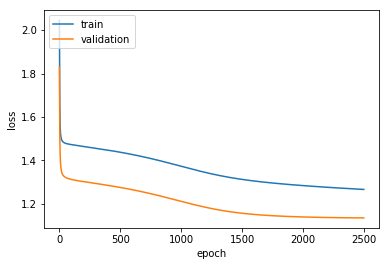

In [52]:
#without half time details loss
plt.plot(without_half_time_details_history.history['loss'])
plt.plot(without_half_time_details_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

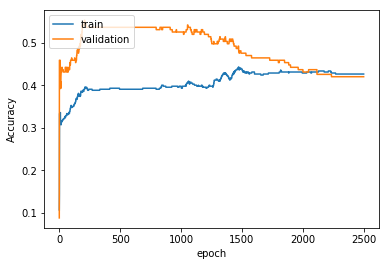

In [53]:
#without halftime details accuracy
plt.plot(without_half_time_details_history.history['acc'])
plt.plot(without_half_time_details_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
#save the model for prediction
without_halftime_details_FTAG_model_json = without_half_time_details_FTAG_model.to_json()
with open("without_half_time_details_FTAG_model.json", "w") as json_file:
    json_file.write(without_halftime_details_FTAG_model_json)
# serialize weights to HDF5
without_half_time_details_FTAG_model.save_weights("without_half_time_details_FTAG_model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
# # load without halftime json and create model
# json_file = open('without_halftime_details_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("without_halftime_details_model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# score = loaded_model.evaluate(Xtest_without_halftime, Ytest_without_halftime, verbose=2)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1] * 100)

In [57]:

# model with half time statistics
X = fixtures[[0,1,2,3,4,5,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[9]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_with_halftime = X.ix[600:,]
Ytest_with_halftime = to_categorical(Y.ix[600:,], num_classes=7)


/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [15]:
# def regression_model():
# 	model = Sequential()
# 	model.add(Dense(15, input_shape=(8,), kernel_initializer='normal', activation='relu'))
# 	#model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# 	model.add(Dense(7, kernel_initializer='normal'))
# 	model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
# 	return model

In [16]:
# estimator = KerasClassifier(build_fn=regression_model, nb_epoch=100, batch_size=300)#, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, Xtrain, Ytrain, cv=kfold)
# results
# print("Results: %.2f MSE" % (results.mean()))


In [17]:
# #second model
# model = Sequential()
# model.add(Dense(500, input_shape=(8,), kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1000, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(100, kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
# # train model
# history = model.fit(X_scaled, Y_scaled, epochs=100, batch_size=30, verbose=2, validation_split = 0.3)


In [58]:
model_with_half_time_FTAG_statistics = Sequential()
model_with_half_time_FTAG_statistics.add(Dense(200, input_dim=8, activation='relu'))
model_with_half_time_FTAG_statistics.add(Dense(500, activation='relu'))
model_with_half_time_FTAG_statistics.add(Dense(500, activation='relu'))
model_with_half_time_FTAG_statistics.add(Dense(7, activation='softmax'))
model_with_half_time_FTAG_statistics.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [ ]:
model_with_half_time_statistics_history = model_with_half_time_FTAG_statistics.fit(Xtrain, Ytrain, epochs=1000, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/1000
 - 0s - loss: 1.9145 - acc: 0.2690 - val_loss: 1.9077 - val_acc: 0.2818
Epoch 2/1000
 - 0s - loss: 1.9081 - acc: 0.2762 - val_loss: 1.9008 - val_acc: 0.2873
Epoch 3/1000
 - 0s - loss: 1.9019 - acc: 0.2810 - val_loss: 1.8940 - val_acc: 0.2928
Epoch 4/1000
 - 0s - loss: 1.8957 - acc: 0.2857 - val_loss: 1.8873 - val_acc: 0.3039
Epoch 5/1000
 - 0s - loss: 1.8896 - acc: 0.2929 - val_loss: 1.8807 - val_acc: 0.3094
Epoch 6/1000
 - 0s - loss: 1.8836 - acc: 0.3000 - val_loss: 1.8741 - val_acc: 0.3094
Epoch 7/1000
 - 0s - loss: 1.8777 - acc: 0.3095 - val_loss: 1.8676 - val_acc: 0.3149
Epoch 8/1000
 - 0s - loss: 1.8718 - acc: 0.3119 - val_loss: 1.8611 - val_acc: 0.3204
Epoch 9/1000
 - 0s - loss: 1.8660 - acc: 0.3095 - val_loss: 1.8547 - val_acc: 0.3149
Epoch 10/1000
 - 0s - loss: 1.8603 - acc: 0.3143 - val_loss: 1.8484 - val_acc: 0.3204
Epoch 11/1000
 - 0s - loss: 1.8546 - acc: 0.3190 - val_loss: 1.8421 - val_acc: 0.3370
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 1.5251 - acc: 0.4548 - val_loss: 1.4529 - val_acc: 0.5580
Epoch 97/1000
 - 0s - loss: 1.5224 - acc: 0.4571 - val_loss: 1.4496 - val_acc: 0.5580
Epoch 98/1000
 - 0s - loss: 1.5199 - acc: 0.4595 - val_loss: 1.4464 - val_acc: 0.5525
Epoch 99/1000
 - 0s - loss: 1.5173 - acc: 0.4595 - val_loss: 1.4432 - val_acc: 0.5525
Epoch 100/1000
 - 0s - loss: 1.5147 - acc: 0.4595 - val_loss: 1.4401 - val_acc: 0.5525
Epoch 101/1000
 - 0s - loss: 1.5122 - acc: 0.4595 - val_loss: 1.4369 - val_acc: 0.5525
Epoch 102/1000
 - 0s - loss: 1.5097 - acc: 0.4571 - val_loss: 1.4338 - val_acc: 0.5525
Epoch 103/1000
 - 0s - loss: 1.5072 - acc: 0.4571 - val_loss: 1.4307 - val_acc: 0.5525
Epoch 104/1000
 - 0s - loss: 1.5048 - acc: 0.4571 - val_loss: 1.4277 - val_acc: 0.5525
Epoch 105/1000
 - 0s - loss: 1.5023 - acc: 0.4571 - val_loss: 1.4246 - val_acc: 0.5580
Epoch 106/1000
 - 0s - loss: 1.4999 - acc: 0.4571 - val_loss: 1.4216 - val_acc: 0.5580
Epoch 107/1000
 - 0s - loss: 1.4975 - acc: 0.45

Epoch 191/1000
 - 0s - loss: 1.3464 - acc: 0.4810 - val_loss: 1.2416 - val_acc: 0.5525
Epoch 192/1000
 - 0s - loss: 1.3451 - acc: 0.4833 - val_loss: 1.2402 - val_acc: 0.5525
Epoch 193/1000
 - 0s - loss: 1.3438 - acc: 0.4833 - val_loss: 1.2388 - val_acc: 0.5525
Epoch 194/1000
 - 0s - loss: 1.3424 - acc: 0.4857 - val_loss: 1.2374 - val_acc: 0.5525
Epoch 195/1000
 - 0s - loss: 1.3411 - acc: 0.4857 - val_loss: 1.2360 - val_acc: 0.5525
Epoch 196/1000
 - 0s - loss: 1.3398 - acc: 0.4857 - val_loss: 1.2346 - val_acc: 0.5580
Epoch 197/1000
 - 0s - loss: 1.3385 - acc: 0.4857 - val_loss: 1.2332 - val_acc: 0.5580
Epoch 198/1000
 - 0s - loss: 1.3373 - acc: 0.4857 - val_loss: 1.2319 - val_acc: 0.5580
Epoch 199/1000
 - 0s - loss: 1.3360 - acc: 0.4857 - val_loss: 1.2305 - val_acc: 0.5580
Epoch 200/1000
 - 0s - loss: 1.3347 - acc: 0.4857 - val_loss: 1.2292 - val_acc: 0.5580
Epoch 201/1000
 - 0s - loss: 1.3335 - acc: 0.4881 - val_loss: 1.2278 - val_acc: 0.5580
Epoch 202/1000
 - 0s - loss: 1.3322 - acc: 

 - 0s - loss: 1.2518 - acc: 0.5190 - val_loss: 1.1478 - val_acc: 0.5746
Epoch 286/1000
 - 0s - loss: 1.2511 - acc: 0.5167 - val_loss: 1.1471 - val_acc: 0.5746
Epoch 287/1000
 - 0s - loss: 1.2504 - acc: 0.5167 - val_loss: 1.1465 - val_acc: 0.5746
Epoch 288/1000
 - 0s - loss: 1.2496 - acc: 0.5167 - val_loss: 1.1458 - val_acc: 0.5746
Epoch 289/1000
 - 0s - loss: 1.2489 - acc: 0.5167 - val_loss: 1.1452 - val_acc: 0.5746
Epoch 290/1000
 - 0s - loss: 1.2482 - acc: 0.5167 - val_loss: 1.1445 - val_acc: 0.5746
Epoch 291/1000
 - 0s - loss: 1.2475 - acc: 0.5167 - val_loss: 1.1439 - val_acc: 0.5746
Epoch 292/1000
 - 0s - loss: 1.2468 - acc: 0.5167 - val_loss: 1.1432 - val_acc: 0.5746
Epoch 293/1000
 - 0s - loss: 1.2461 - acc: 0.5167 - val_loss: 1.1426 - val_acc: 0.5746
Epoch 294/1000
 - 0s - loss: 1.2454 - acc: 0.5167 - val_loss: 1.1420 - val_acc: 0.5746
Epoch 295/1000
 - 0s - loss: 1.2447 - acc: 0.5167 - val_loss: 1.1414 - val_acc: 0.5746
Epoch 296/1000
 - 0s - loss: 1.2440 - acc: 0.5167 - val_lo

Epoch 380/1000
 - 0s - loss: 1.1972 - acc: 0.5381 - val_loss: 1.1027 - val_acc: 0.5580
Epoch 381/1000
 - 0s - loss: 1.1967 - acc: 0.5381 - val_loss: 1.1024 - val_acc: 0.5580
Epoch 382/1000
 - 0s - loss: 1.1963 - acc: 0.5381 - val_loss: 1.1021 - val_acc: 0.5580
Epoch 383/1000
 - 0s - loss: 1.1958 - acc: 0.5381 - val_loss: 1.1017 - val_acc: 0.5580
Epoch 384/1000
 - 0s - loss: 1.1954 - acc: 0.5357 - val_loss: 1.1014 - val_acc: 0.5580
Epoch 385/1000
 - 0s - loss: 1.1949 - acc: 0.5357 - val_loss: 1.1011 - val_acc: 0.5580
Epoch 386/1000
 - 0s - loss: 1.1945 - acc: 0.5357 - val_loss: 1.1007 - val_acc: 0.5580
Epoch 387/1000
 - 0s - loss: 1.1940 - acc: 0.5381 - val_loss: 1.1004 - val_acc: 0.5580
Epoch 388/1000
 - 0s - loss: 1.1936 - acc: 0.5381 - val_loss: 1.1001 - val_acc: 0.5580
Epoch 389/1000
 - 0s - loss: 1.1932 - acc: 0.5381 - val_loss: 1.0998 - val_acc: 0.5580
Epoch 390/1000
 - 0s - loss: 1.1927 - acc: 0.5381 - val_loss: 1.0995 - val_acc: 0.5580
Epoch 391/1000
 - 0s - loss: 1.1923 - acc: 

 - 0s - loss: 1.1607 - acc: 0.5405 - val_loss: 1.0788 - val_acc: 0.5470
Epoch 475/1000
 - 0s - loss: 1.1604 - acc: 0.5405 - val_loss: 1.0786 - val_acc: 0.5470
Epoch 476/1000
 - 0s - loss: 1.1600 - acc: 0.5405 - val_loss: 1.0784 - val_acc: 0.5470
Epoch 477/1000
 - 0s - loss: 1.1597 - acc: 0.5405 - val_loss: 1.0782 - val_acc: 0.5470
Epoch 478/1000
 - 0s - loss: 1.1594 - acc: 0.5405 - val_loss: 1.0780 - val_acc: 0.5470
Epoch 479/1000
 - 0s - loss: 1.1590 - acc: 0.5405 - val_loss: 1.0778 - val_acc: 0.5470
Epoch 480/1000
 - 0s - loss: 1.1587 - acc: 0.5405 - val_loss: 1.0776 - val_acc: 0.5470
Epoch 481/1000
 - 0s - loss: 1.1584 - acc: 0.5405 - val_loss: 1.0775 - val_acc: 0.5470
Epoch 482/1000
 - 0s - loss: 1.1581 - acc: 0.5405 - val_loss: 1.0773 - val_acc: 0.5470
Epoch 483/1000
 - 0s - loss: 1.1577 - acc: 0.5405 - val_loss: 1.0771 - val_acc: 0.5470
Epoch 484/1000
 - 0s - loss: 1.1574 - acc: 0.5405 - val_loss: 1.0769 - val_acc: 0.5470
Epoch 485/1000
 - 0s - loss: 1.1571 - acc: 0.5405 - val_lo

Epoch 569/1000
 - 0s - loss: 1.1325 - acc: 0.5405 - val_loss: 1.0644 - val_acc: 0.5525
Epoch 570/1000
 - 0s - loss: 1.1322 - acc: 0.5405 - val_loss: 1.0643 - val_acc: 0.5525
Epoch 571/1000
 - 0s - loss: 1.1320 - acc: 0.5405 - val_loss: 1.0641 - val_acc: 0.5525
Epoch 572/1000
 - 0s - loss: 1.1317 - acc: 0.5405 - val_loss: 1.0640 - val_acc: 0.5525
Epoch 573/1000
 - 0s - loss: 1.1314 - acc: 0.5405 - val_loss: 1.0639 - val_acc: 0.5525
Epoch 574/1000
 - 0s - loss: 1.1312 - acc: 0.5405 - val_loss: 1.0638 - val_acc: 0.5525
Epoch 575/1000
 - 0s - loss: 1.1309 - acc: 0.5405 - val_loss: 1.0637 - val_acc: 0.5525
Epoch 576/1000
 - 0s - loss: 1.1306 - acc: 0.5405 - val_loss: 1.0636 - val_acc: 0.5525
Epoch 577/1000
 - 0s - loss: 1.1304 - acc: 0.5405 - val_loss: 1.0635 - val_acc: 0.5525
Epoch 578/1000
 - 0s - loss: 1.1301 - acc: 0.5429 - val_loss: 1.0634 - val_acc: 0.5525
Epoch 579/1000
 - 0s - loss: 1.1299 - acc: 0.5429 - val_loss: 1.0633 - val_acc: 0.5525
Epoch 580/1000
 - 0s - loss: 1.1296 - acc: 

 - 0s - loss: 1.1097 - acc: 0.5500 - val_loss: 1.0558 - val_acc: 0.5525
Epoch 664/1000
 - 0s - loss: 1.1094 - acc: 0.5500 - val_loss: 1.0557 - val_acc: 0.5525
Epoch 665/1000
 - 0s - loss: 1.1092 - acc: 0.5500 - val_loss: 1.0557 - val_acc: 0.5525
Epoch 666/1000
 - 0s - loss: 1.1090 - acc: 0.5500 - val_loss: 1.0556 - val_acc: 0.5525
Epoch 667/1000
 - 0s - loss: 1.1088 - acc: 0.5500 - val_loss: 1.0555 - val_acc: 0.5525
Epoch 668/1000
 - 0s - loss: 1.1086 - acc: 0.5500 - val_loss: 1.0555 - val_acc: 0.5525
Epoch 669/1000
 - 0s - loss: 1.1083 - acc: 0.5500 - val_loss: 1.0554 - val_acc: 0.5525
Epoch 670/1000
 - 0s - loss: 1.1081 - acc: 0.5500 - val_loss: 1.0553 - val_acc: 0.5525
Epoch 671/1000
 - 0s - loss: 1.1079 - acc: 0.5500 - val_loss: 1.0553 - val_acc: 0.5525
Epoch 672/1000
 - 0s - loss: 1.1077 - acc: 0.5500 - val_loss: 1.0552 - val_acc: 0.5525
Epoch 673/1000
 - 0s - loss: 1.1074 - acc: 0.5500 - val_loss: 1.0551 - val_acc: 0.5525
Epoch 674/1000
 - 0s - loss: 1.1072 - acc: 0.5500 - val_lo

Epoch 758/1000
 - 0s - loss: 1.0901 - acc: 0.5500 - val_loss: 1.0505 - val_acc: 0.5525
Epoch 759/1000
 - 0s - loss: 1.0899 - acc: 0.5476 - val_loss: 1.0505 - val_acc: 0.5525
Epoch 760/1000
 - 0s - loss: 1.0897 - acc: 0.5476 - val_loss: 1.0504 - val_acc: 0.5525
Epoch 761/1000
 - 0s - loss: 1.0895 - acc: 0.5476 - val_loss: 1.0504 - val_acc: 0.5525
Epoch 762/1000
 - 0s - loss: 1.0893 - acc: 0.5476 - val_loss: 1.0503 - val_acc: 0.5525
Epoch 763/1000
 - 0s - loss: 1.0891 - acc: 0.5476 - val_loss: 1.0503 - val_acc: 0.5525
Epoch 764/1000
 - 0s - loss: 1.0889 - acc: 0.5476 - val_loss: 1.0502 - val_acc: 0.5525
Epoch 765/1000
 - 0s - loss: 1.0888 - acc: 0.5500 - val_loss: 1.0502 - val_acc: 0.5525
Epoch 766/1000
 - 0s - loss: 1.0886 - acc: 0.5500 - val_loss: 1.0501 - val_acc: 0.5525
Epoch 767/1000
 - 0s - loss: 1.0884 - acc: 0.5500 - val_loss: 1.0501 - val_acc: 0.5525
Epoch 768/1000
 - 0s - loss: 1.0882 - acc: 0.5500 - val_loss: 1.0501 - val_acc: 0.5525
Epoch 769/1000
 - 0s - loss: 1.0880 - acc: 

 - 0s - loss: 1.0732 - acc: 0.5476 - val_loss: 1.0473 - val_acc: 0.5525
Epoch 853/1000
 - 0s - loss: 1.0730 - acc: 0.5476 - val_loss: 1.0472 - val_acc: 0.5525
Epoch 854/1000
 - 0s - loss: 1.0728 - acc: 0.5476 - val_loss: 1.0472 - val_acc: 0.5525
Epoch 855/1000
 - 0s - loss: 1.0726 - acc: 0.5476 - val_loss: 1.0472 - val_acc: 0.5525
Epoch 856/1000
 - 0s - loss: 1.0725 - acc: 0.5476 - val_loss: 1.0472 - val_acc: 0.5525
Epoch 857/1000
 - 0s - loss: 1.0723 - acc: 0.5476 - val_loss: 1.0471 - val_acc: 0.5525
Epoch 858/1000
 - 0s - loss: 1.0721 - acc: 0.5476 - val_loss: 1.0471 - val_acc: 0.5525
Epoch 859/1000
 - 0s - loss: 1.0720 - acc: 0.5476 - val_loss: 1.0471 - val_acc: 0.5525
Epoch 860/1000
 - 0s - loss: 1.0718 - acc: 0.5476 - val_loss: 1.0471 - val_acc: 0.5525
Epoch 861/1000
 - 0s - loss: 1.0716 - acc: 0.5500 - val_loss: 1.0471 - val_acc: 0.5525
Epoch 862/1000
 - 0s - loss: 1.0715 - acc: 0.5524 - val_loss: 1.0470 - val_acc: 0.5525
Epoch 863/1000
 - 0s - loss: 1.0713 - acc: 0.5524 - val_lo

Epoch 947/1000
 - 0s - loss: 1.0579 - acc: 0.5571 - val_loss: 1.0454 - val_acc: 0.5470
Epoch 948/1000
 - 0s - loss: 1.0577 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 949/1000
 - 0s - loss: 1.0576 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 950/1000
 - 0s - loss: 1.0574 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 951/1000
 - 0s - loss: 1.0573 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 952/1000
 - 0s - loss: 1.0571 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 953/1000
 - 0s - loss: 1.0570 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 954/1000
 - 0s - loss: 1.0568 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 955/1000
 - 0s - loss: 1.0567 - acc: 0.5571 - val_loss: 1.0453 - val_acc: 0.5470
Epoch 956/1000
 - 0s - loss: 1.0565 - acc: 0.5571 - val_loss: 1.0452 - val_acc: 0.5470
Epoch 957/1000
 - 0s - loss: 1.0564 - acc: 0.5548 - val_loss: 1.0452 - val_acc: 0.5470
Epoch 958/1000
 - 0s - loss: 1.0562 - acc: 

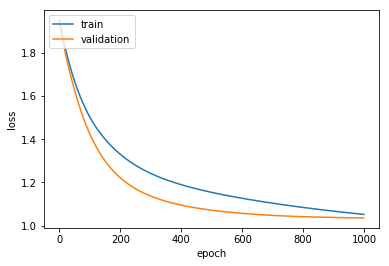

In [39]:
plt.plot(model_with_half_time_statistics_history.history['loss'])
plt.plot(model_with_half_time_statistics_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

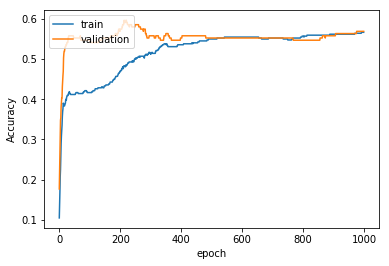

In [40]:
plt.plot(model_with_half_time_statistics_history.history['acc'])
plt.plot(model_with_half_time_statistics_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
#save the model for prediction
model_with_half_time_FTAG_statistics_json = model_with_half_time_FTAG_statistics.to_json()
with open("with_halftime_details_FTAG_model.json", "w") as json_file:
    json_file.write(model_with_half_time_FTAG_statistics_json)
# serialize weights to HDF5
model_with_half_time_statistics.save_weights("with_halftime_details_FTAG_model.h5")
print("Saved model to disk")

Saved model to disk


In [23]:
# # load with halftime json and create model
# json_file = open('with_halftime_details_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("with_halftime_details_model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# score = loaded_model.evaluate(Xtest_with_halftime, Ytest_with_halftime, verbose=2)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1] * 100)